# Goal Misgeneralization Evaluation

In the following, we evaluate a model on its ability (by measuring success-rate (SR)) to pursue two goals:

1. The "true goal" of going to the red ball
2. The "confounding goal" of going to the bottom right

The model is trained on a "causally confused" environment, where the red ball is always situated at the bottom right.

The model is then evaluated in both the causally confused environment and a "normal" environment, where the ball is placed randomly.

Optionally, for each environment, we evaluate the model under two modes of operation: conditioned on visual goals vs conditioned on textual goals.

In [1]:
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import pandas as pd
from pprint import pprint

In [2]:
sns.set_style("ticks")
sns.set_context("paper")

## Functions

### Multi-modal

In [3]:
def parse_multimodal(parent_dir) -> pd.core.frame.DataFrame:
    results = {
        "cc": {
            "conf_goal": {"visual": None, "textual": None},
            "true_goal": {"visual": None, "textual": None},
        },
        "normal": {
            "conf_goal": {"visual": None, "textual": None},
            "true_goal": {"visual": None, "textual": None},
        },
    }

    for mode in ["textual", "visual"]:
        mode_dir = os.path.join(data_dir, mode)
        for env_type in ["cc", "normal"]:
            env_dir = os.path.join(mode_dir, env_type)
            for goal in ["conf_goal", "true_goal"]:
                goal_dir = os.path.join(env_dir, goal)
                outcomes_path = os.path.join(goal_dir, "results.npy")
                outcomes = np.load(outcomes_path)
                sr = outcomes.mean()
                results[env_type][goal][mode] = sr

    results_df = pd.DataFrame(
        index=["Causally Confused Env", "Normal Env"],
        columns=pd.MultiIndex.from_tuples(
            [
                ("Confounding Goal", "Visual"),
                ("Confounding Goal", "Textual"),
                ("True Goal", "Visual"),
                ("True Goal", "Textual"),
            ]
        ),
        data=[
            [
                results["cc"]["conf_goal"]["visual"],
                results["cc"]["conf_goal"]["textual"],
                results["cc"]["true_goal"]["visual"],
                results["cc"]["true_goal"]["textual"],
            ],
            [
                results["normal"]["conf_goal"]["visual"],
                results["normal"]["conf_goal"]["textual"],
                results["normal"]["true_goal"]["visual"],
                results["normal"]["true_goal"]["textual"],
            ],
        ],
    )

    return results_df


def plot_multimodal(multimodal_df):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4), sharey=True)

    # confounding goal, confounding goal, true goal, true goal
    colors = ["#C52233", "#C52233", "#110304", "#110304"]
    # visual, textual, visual, textual
    hatches = ["/", "\\", "/", "\\"]

    x_locations = [0.25, 0.75, 1.375, 1.875]

    ax1.bar(
        x=x_locations,
        height=multimodal_df.loc["Causally Confused Env"],
        width=0.5,
        color=colors,
        hatch=hatches,
    )
    ax1.set_xlim([-0.15, 2.35])
    ax1.set_xticks([1.0625])
    ax1.set_xticklabels(["Causally Confused Env"])
    ax1.set_ylabel("Success Rate")
    ax1.spines[["right"]].set_visible(False)

    ax2.bar(
        x=x_locations,
        height=multimodal_df.loc["Normal Env"],
        width=0.5,
        color=colors,
        hatch=hatches,
    )
    ax2.set_xlim([-0.235, 2.275])
    ax2.set_xticks([1.0625])
    ax2.set_xticklabels(["Normal Env"])
    ax2.tick_params(axis="y", which="both", left=False, right=False, labelleft=False)
    ax2.spines[["left"]].set_visible(False)

    legend_elements = [
        Patch(facecolor="#C52233", label="Confounding Goal"),
        Patch(facecolor="#110304", label="True Goal"),
        Patch(facecolor="white", hatch="///", label="Visual", edgecolor="black"),
        Patch(facecolor="white", hatch="\\\\\\", label="Textual", edgecolor="black"),
    ]

    ax2.legend(handles=legend_elements)

    f.subplots_adjust(wspace=0, hspace=0)

    plt.show()

### Uni-modal

In [4]:
def parse_unimodal(parent_dir) -> pd.core.frame.DataFrame:
    results = {
        "cc": {"conf_goal": None, "true_goal": None},
        "normal": {"conf_goal": None, "true_goal": None},
    }

    for env_type in ["cc", "normal"]:
        env_dir = os.path.join(data_dir, env_type)
        for goal in ["conf_goal", "true_goal"]:
            goal_dir = os.path.join(env_dir, goal)
            outcomes_path = os.path.join(goal_dir, "results.npy")
            outcomes = np.load(outcomes_path)
            sr = outcomes.mean()
            results[env_type][goal] = sr

    results_df = pd.DataFrame(
        index=["Causally Confused Env", "Normal Env"],
        columns=["Confounding Goal", "True Goal"],
        data=[
            [results["cc"]["conf_goal"], results["cc"]["true_goal"]],
            [results["normal"]["conf_goal"], results["normal"]["true_goal"]],
        ],
    )

    return results_df


def plot_unimodal(unimodal_df):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4), sharey=True)

    # confounding goal, true goal
    colors = ["#C52233", "#110304"]

    x_locations = [0.25, 1.375]

    width = 1

    ax1.bar(
        x=x_locations,
        height=unimodal_df.loc["Causally Confused Env"],
        color=colors,
        width=width,
    )
    ax1.set_xlim([-0.35, 2.15])
    ax1.set_xticks([0.8125])
    ax1.set_xticklabels(["Causally Confused Env"])
    ax1.set_ylabel("Success Rate")
    ax1.spines[["right"]].set_visible(False)

    ax2.set_xlim([-0.525, 1.9975])
    ax2.bar(
        x=x_locations, height=unimodal_df.loc["Normal Env"], color=colors, width=width
    )
    ax2.set_xticks([0.8125])
    ax2.set_xticklabels(["Normal Env"])
    ax2.tick_params(axis="y", which="both", left=False, right=False, labelleft=False)

    ax2.spines[["left"]].set_visible(False)

    legend_elements = [
        Patch(facecolor="#110304", label="True Goal"),
        Patch(facecolor="#C52233", label="Confounding Goal"),
    ]
    ax2.legend(handles=legend_elements)

    f.subplots_adjust(wspace=0, hspace=0)

    plt.show()

## Parsing and Plotting

We will plot the results using a barplot. The y-axis will be the SR. 
We will then have two groups of bars on the x-axis, one for each environment
setting (causally confused or normal). Within each group, we will have a bar for
the success rate on the true goal and one for the success rate on the confounding goal.

As mentioned we may optionally have an additional split, with one bar for the
model operating with visual goals and one for the model operating with textual goals.

In [5]:
# adjust this accordingly
data_dir = "../outputs/babyai/gcbc_cclipt/multi_task/GCBC-BabyAI-s1"

In [6]:
# uncomment one of the following lines accordingly
multi_modal = True
# multi_modal = False

Confounding Goal         True Goal        
                                Visual Textual    Visual Textual
Causally Confused Env            0.880   0.877     0.880   0.877
Normal Env                       0.126   0.123     0.524   0.539

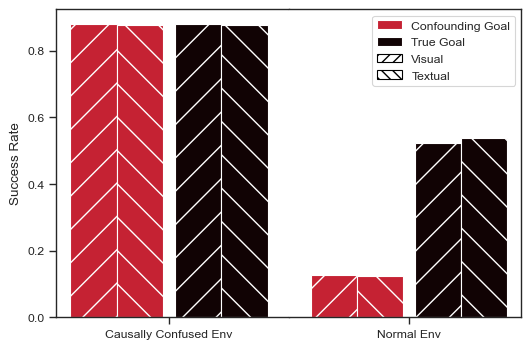

In [7]:
if multi_modal:
    results_df = parse_multimodal(data_dir)
    display(results_df)
    plot_multimodal(results_df)
else:
    results_df = parse_unimodal(data_dir)
    display(results_df)
    plot_unimodal(results_df)